
## Objective:
**Collect a dataset from one or more open web APIs of your choice, and use Python to pre-process and analyse the collected data **

**Task-1:**    
Choose one or more suitable web APIs as the source data.

**Task-2: **    
Collect data from the chosen API(s) using Python.

**Task-3: **    
Parse the collected data, and store it in an appropriate file format for subsequent analysis (e.g. JSON, CSV, XML).

**Task-4: **   
Load and represent the data as Pandas Dataframe.  Apply  any  pre-processing and quality checking steps that may be required to clean and filter the data before analysis. 
    
**Task-5: **     
Analyse and summarise the cleaned dataset, using visualisation



# Task 1: Identify one or more suitable web APIs

A Single API was chosen for the assignment which is provided by https://fixer.io/.

Fixer.io provide REST API with JSON output for current and historical foreign exchange rates published by the European Central Bank.

The API can be accesed using http://data.fixer.io/api/, different arguments can be added and they would complete the request accordingly.

Example query:

http://data.fixer.io/api/2018-03-01?base=EUR

This returns most recent foreign exchange rates of different countries for 01 March 2018 with base curreny as EURO.

The API is freely avaliable with some limited feature, the user get 30 days trial upon signing up, this entitles the user to request 1000 calls to the API per month.

The API key I received which works here is f82869dd3*****4fce30522c5************

Since, the API only provided a one day data on each call. The request was designed such that all the data of first day of the month was collected since 2009 - present.

The functions that perform the function are as follows and are thoroughly commented.

In [11]:
# Import required libraries
import math
from datetime import timedelta
import datetime
import requests
import json
import csv
import pandas as pd
from pandas import Series, DataFrame, Panel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [16]:
# set key
key="f82869dd**$$*********"

# set base url
base_url="http://data.fixer.io/api/"

# set base currency
base_currency = "EUR" 

# set response format
response_format=".json"

# Task 2 and 3:
### Collect data from the chosen API(s) using Python.
### Parse the collected data, and store it in a CSV file format for subsequent analysis.

In [17]:
# We only want data within a particular date range, In free version of fixer.io API it doesnot allows us to specify start and end dates, therefore I have used datetime library to collect data.
# start_date is taken as jan 2009
# the API needs the date in 0x format, therefore for day 1 need to have a 0 added to the front.
year = 2009
day = "%02d" % 1 

# End_date is taken as current date 
current = datetime.datetime.now()
current_year = current.year
current_date = current.now()

In [18]:
#Function to create a file with set headings
def create_file (file_loc, headings): 
    with open(file_loc, "w",newline='') as write_file: #as in get_and_write_data function 
        f = csv.writer(write_file)
        # to write the headings of the columns
        f.writerow(["Date","Base", "AOA","AWG","AZN","BGN","BHD", "BND","BRL", "CAD","CHF","CNY","CZK","DKK","EUR","GBP","GIP","HKD","HRK","HUF","IDR","INR", "ISK","JPY","JOD","KRW","KWD","LYD","MXN","MYR","NOK","NZD","OMR","PHP","PLN", "PYG",'QAR',"RON","SEK","SGD","THB","TRY","USD", 'UZS','VEF','VND', 'VUV','WST', 'XAF', 'XCD','XDR','XOF', 'XPF','YER', 'ZAR','ZMK'])
    write_file.close()
    
    
##Function to request the API and collect the data in JSON format, retreive the raw csv data, and write to a file
def get_and_write_data(url, file_loc): 
    # A try-except block to handle any exception while requesting the API 
    try:
        # URL is used to request the API
        response = requests.get(url)
        print(" Collected Data for : " , today)
    except:
        print("URL unreachable")
    #  read and parse the response data in json format
    data = response.json()
    # to write data to a file
    with open(file_loc, "a",newline='') as write_file: #open the file / create it, newline ='' to prevent blank lines being written 
        f = csv.writer(write_file)
        # to write the values in each column
        f.writerow([ today ,data ["base"] , data["rates"]['AOA'],data["rates"]['AWG'],data["rates"]['AZN'],  data["rates"]["BGN"],data["rates"]["BHD"] , data["rates"]["BND"], data["rates"]["BRL"] , data["rates"]["CAD"] , data["rates"]["CHF"] , data["rates"]["CNY"] , data["rates"]["CZK"] , data["rates"]["DKK"] ,data["rates"]["EUR"], data["rates"]["GBP"] , data["rates"]["GIP"] , data["rates"]["HKD"] , data["rates"]["HRK"] , data["rates"]["HUF"] , data["rates"]["IDR"]  ,data["rates"]["INR"] ,  data["rates"]["ISK"] , data["rates"]["JPY"] , data["rates"]["JOD"], data["rates"]["KRW"] ,data["rates"]["KWD"]  , data["rates"]["LYD"]  ,data["rates"]["MXN"] , data["rates"]["MYR"] , data["rates"]["NOK"] , data["rates"]["NZD"] , data["rates"]["OMR"] ,data["rates"]["PHP"] , data["rates"]["PLN"] , data["rates"][ 'PYG'],data["rates"]['QAR'] , data["rates"]["RON"] , data["rates"]["SEK"] , data["rates"]["SGD"] , data["rates"]["THB"] , data["rates"]["TRY"] , data["rates"]["USD"] , data["rates"]['UZS'],data["rates"]['VEF'],data["rates"]['VND'], data["rates"]['VUV'],data["rates"]['WST'], data["rates"]['XAF'],data["rates"][ 'XCD'],data["rates"]['XDR'],data["rates"]['XOF'],data["rates"][ 'XPF'],data["rates"]['YER'],data["rates"][ 'ZAR'],data["rates"]['ZMK']])
    write_file.close()
    

#Function that generates the URL to be requested
def get_raw_data(file_loc): 
    global today, year, day, current_year, base_currency, current_month
    #A loop to iterate over all years beginning from 2009 till present
    while year <= current_year:
    # If condition is used to take data till latest month of present year
        if year == current_year:
            month_end = current_date.month
        else:
            month_end = 12
        
         #A loop to iterate over all months beginning at Jan is needed, the API needs the month in 0x format,
         # therefore, months 1-9 need to have a 0 added to the front and others can be sued as they are          
        for month in range(1, month_end+1):
            #month needs to be a string to avoid invalid token errors for ints as the 
            #API needs a leading 0 for single digit months
            # Format: 2018-03-01 (YYYY-MM-DD)
            today = str(year) + "-" + str("%02d" % month) + "-" + str(day)
            # Sample: http://data.fixer.io/api/2013-12-24?access_key = API_KEY
            url =  base_url + today + '?access_key=' + key 
            # Call the function get_and_write_data
            get_and_write_data(url,file_loc)
        print ("Data collection for year %d is completed !!" %year )
        #Increment year to generate the next year request
        year += 1 
        

### Collecting Raw Data and writing raw data to CSV:

The following code retreives the raw data using the above Functions from the API and writes it to a CSV file.

In [19]:
# Set Variable get the raw data from the API and store in the File location set here
raw_file_loc = "currency_excg_data.csv"
print ("Begin Raw Data Collection")
# create a file file by calling create_file function with no headings to store the raw data, no headings needed as the data returns 2 distinct CSV lines with different # of columns
create_file(raw_file_loc,"")
# Store data in csv file by calling get_raw_data function
get_raw_data("currency_excg_data.csv")

print("Data Stored in a csv file Complete !!!")

Begin Raw Data Collection
 Collected Data for :  2009-01-01
 Collected Data for :  2009-02-01
 Collected Data for :  2009-03-01
 Collected Data for :  2009-04-01
 Collected Data for :  2009-05-01
 Collected Data for :  2009-06-01
 Collected Data for :  2009-07-01
 Collected Data for :  2009-08-01
 Collected Data for :  2009-09-01
 Collected Data for :  2009-10-01
 Collected Data for :  2009-11-01
 Collected Data for :  2009-12-01
Data collection for year 2009 is completed !!
 Collected Data for :  2010-01-01
 Collected Data for :  2010-02-01
 Collected Data for :  2010-03-01
 Collected Data for :  2010-04-01
 Collected Data for :  2010-05-01
 Collected Data for :  2010-06-01
 Collected Data for :  2010-07-01
 Collected Data for :  2010-08-01
 Collected Data for :  2010-09-01
 Collected Data for :  2010-10-01
 Collected Data for :  2010-11-01
 Collected Data for :  2010-12-01
Data collection for year 2010 is completed !!
 Collected Data for :  2011-01-01
 Collected Data for :  2011-02-0

# Task 4: 
## Load and represent the data as Pandas Dataframe. Apply any pre-processing and quality checking steps that may be required to clean and filter the data before analysis.
 

In [20]:
# Read the data from the currency_excg_data.csv in Pandas Dataframe
currency_excg_data =pd.read_csv("currency_excg_data.csv")

# Show the first 10 rows of the dataframe
currency_excg_data.head()

,Date,Base,AOA,AWG,AZN,BGN,BHD,BND,BRL,CAD,...,VUV,WST,XAF,XCD,XDR,XOF,XPF,YER,ZAR,ZMK
0,2009-01-01,EUR,104.879019,2.496489,1.132878,1.959754,0.525026,2.078870,3.239179,1.697788,...,156.196895,4.181436,681.512709,3.710520,0.901549,654.250382,119.051464,279.053947,13.130713,6708.731362
1,2009-02-01,EUR,96.401798,2.292436,1.033451,1.954169,0.482113,1.953103,2.965494,1.580950,...,147.291222,3.982600,651.733322,3.392075,0.849687,654.838562,118.998885,256.159737,13.105463,6615.320812
2,2009-03-01,EUR,95.208887,2.268307,1.020463,1.959903,0.477038,1.956376,3.014921,1.605228,...,148.919148,3.934156,649.284544,3.364719,0.862161,659.072367,119.879204,253.375752,12.812381,7111.558356
3,2009-04-01,EUR,99.995437,2.371685,1.063567,1.956080,0.498779,2.027309,3.041925,1.673373,...,149.580845,3.898003,663.258052,3.546478,0.887934,656.501667,119.951340,264.955909,12.441318,7412.135358
4,2009-05-01,EUR,103.135876,2.375389,1.065989,1.954869,0.499558,2.002951,2.886245,1.573498,...,147.478946,3.953649,663.576158,3.562484,0.885650,655.449216,119.112481,266.067552,11.194923,7483.412013


In [21]:
# Describe the dataframe i.e. returns the count, max, min etc in the column.
data_summary = currency_excg_data.describe()
data_summary

,AOA,AWG,AZN,BGN,BHD,BND,BRL,CAD,CHF,CNY,...,VUV,WST,XAF,XCD,XDR,XOF,XPF,YER,ZAR,ZMK
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,140.571251,2.269554,1.268901,1.957369,0.477777,1.686130,3.039472,1.427846,1.226662,8.218055,...,126.092291,3.129204,660.478869,3.413884,0.850521,657.150472,119.493730,278.777531,12.780972,6554.966872
std,31.014954,0.216967,0.356875,0.005556,0.045585,0.164720,0.616561,0.092545,0.138109,0.849986,...,9.037594,0.337522,11.637179,0.317810,0.041575,4.467991,0.485025,20.660529,2.340849,1726.704611
min,95.208887,1.885990,0.886937,1.935824,0.396371,1.471496,2.217352,1.229694,1.032310,6.658286,...,111.825266,2.663347,639.301371,2.845373,0.773091,648.842485,117.894985,228.603132,8.856452,10.208422
25%,123.376448,2.044354,1.038269,1.954875,0.430307,1.561913,2.510838,1.362189,1.102835,7.508503,...,119.835724,2.888535,655.590322,3.084303,0.809409,655.444806,119.222188,269.001786,10.581810,5939.512596
50%,128.153716,2.324999,1.098768,1.957476,0.489752,1.648246,3.014921,1.414911,1.208549,8.122540,...,123.754954,3.057328,656.168102,3.496425,0.854415,656.277474,119.446327,282.599689,13.105463,6643.639117
75%,147.989641,2.430804,1.198568,1.959182,0.513019,1.740326,3.469930,1.484185,1.265226,8.756432,...,128.913030,3.219000,657.675282,3.676049,0.884534,658.096037,119.746060,293.096106,14.583929,7029.752117
max,263.722983,2.701506,2.126886,1.981089,0.568142,2.112165,4.487088,1.697788,1.527516,10.302510,...,156.196895,4.181436,710.183932,3.999166,0.936769,683.940986,121.529517,317.685738,17.500073,11264.141529


In [22]:
# Count the number of columns of a particular datatype 
currency_excg_data.dtypes.value_counts()

float64    53
object      2
int64       1
dtype: int64

In [23]:
# Convert the timedate column of data to datetime data type.
currency_excg_data['Date']=pd.to_datetime(currency_excg_data['Date'])
# Sort the values according the dates
processed_df=currency_excg_data.sort_values(by=['Date'])

In [24]:
# Count the number of columns of a particular datatype 
processed_df.dtypes.value_counts()

float64           53
object             1
int64              1
datetime64[ns]     1
dtype: int64

The Date column is sucessfully converted into Datetime data type.

#### Final Pre-Processing steps are to look for missing data to see if further pre-processing is needed.

In [25]:
# handle missing data
# Check if there is any null value in any column
null_value_count = processed_df.isnull().sum()  # no missing values in the reduced dataset
null_value_count

Date    0
Base    0
AOA     0
AWG     0
AZN     0
BGN     0
BHD     0
BND     0
BRL     0
CAD     0
CHF     0
CNY     0
CZK     0
DKK     0
EUR     0
GBP     0
GIP     0
HKD     0
HRK     0
HUF     0
IDR     0
INR     0
ISK     0
JPY     0
JOD     0
KRW     0
KWD     0
LYD     0
MXN     0
MYR     0
NOK     0
NZD     0
OMR     0
PHP     0
PLN     0
PYG     0
QAR     0
RON     0
SEK     0
SGD     0
THB     0
TRY     0
USD     0
UZS     0
VEF     0
VND     0
VUV     0
WST     0
XAF     0
XCD     0
XDR     0
XOF     0
XPF     0
YER     0
ZAR     0
ZMK     0
dtype: int64

There's no Null's in the data, there's also no strings either, this means there's therefore no values in it such as "Not Available" if, anytime we get "Null" or missing value we can handle it replacing it with "0" using below code.

In [27]:
# If there is Null or missing data, we can handle it by replacing it with 0
for val in null_value_count.iteritems():
    if(val[1] != 0):
        null_currency = val[0]
        processed_df[null_currency] = processed_df[null_currency].fillna(0)

In order to have accurate Analysis I am taking data from 2009 - 2017. 
As for current year we have data only till March 2018.

In [28]:
# create a dataframe which contain data from 01-01-2009 till 01-12-2017 
updated_df = processed_df[:108]   #remove data of 2018 as we have data only till march 2018 
updated_df.tail()

,Date,Base,AOA,AWG,AZN,BGN,BHD,BND,BRL,CAD,...,VUV,WST,XAF,XCD,XDR,XOF,XPF,YER,ZAR,ZMK
103,2017-08-01,EUR,195.076466,2.103263,2.009211,1.956508,0.445110,1.605334,3.693470,1.482560,...,121.540251,2.934169,655.733649,3.195539,0.836879,673.221822,119.377856,295.283956,15.653234,10.569531
104,2017-09-01,EUR,195.832881,2.111406,2.017109,1.946294,0.446721,1.608944,3.726636,1.470042,...,122.734354,2.945534,655.496560,3.206972,0.836889,648.842485,119.626986,296.367825,15.333199,10677.074518
105,2017-10-01,EUR,194.988279,2.102287,2.007446,1.956542,0.444906,1.601991,3.735928,1.473231,...,123.078265,2.980290,655.547359,3.182403,0.835678,650.763567,119.959988,295.205952,16.000645,10630.960248
106,2017-11-01,EUR,192.040331,2.070490,1.977200,1.959174,0.438292,1.581822,3.800282,1.497534,...,123.287221,3.001159,655.600947,3.143672,0.827837,655.787098,119.413250,290.741025,16.355596,10470.167547
107,2017-12-01,EUR,196.497501,2.118533,2.022847,1.958577,0.448586,1.600687,3.872040,1.508805,...,126.731115,3.067712,655.543069,3.217797,0.838975,683.940986,119.822120,297.487236,16.299020,10713.115463


#### The final Pre-processing step is to get Monthly and Yearly averages to create a reduced size data set that can be easiely visualised

In [29]:
# preprocessed data to get monthly min, max and average data of every month from 2009 -2017
India_monthly_data = updated_df.groupby(updated_df['Date'].dt.month)['INR'].agg(['min', 'mean', 'max'])
India_monthly_avg_data = India_monthly_data["mean"]
India_monthly_avg_data

Date
1     71.099789
2     69.819297
3     69.415635
4     69.182901
5     70.211713
6     69.876577
7     71.050587
8     71.305264
9     73.089063
10    72.465564
11    72.136453
12    72.428931
Name: mean, dtype: float64

In [30]:
# preprocessed data to get Annual min, max and average data of every month from 2009 -2017
India_yearly_data = updated_df.groupby(updated_df['Date'].dt.year)['INR'].agg(['min', 'mean', 'max'])
India_yearly_avg_data = India_yearly_data["mean"]
India_yearly_avg_data

Date
2009    67.342231
2010    60.978026
2011    64.501636
2012    68.440665
2013    77.355192
2014    81.428585
2015    71.268000
2016    74.367077
2017    73.379918
Name: mean, dtype: float64

# Task 5: 
## Analyse and summarise the cleaned dataset

The Following graphs are used to analyze the data.

In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("seaborn-colorblind")

In [32]:
# store all the dates
dates = processed_df["Date"].values

### Analyse the Indian Currency (INR) dataset for Monthly and Anunally Exchange Rate overview from year 2009 - 2017

#### Line graph to analyse the monthly data of Indian Currency (INR)

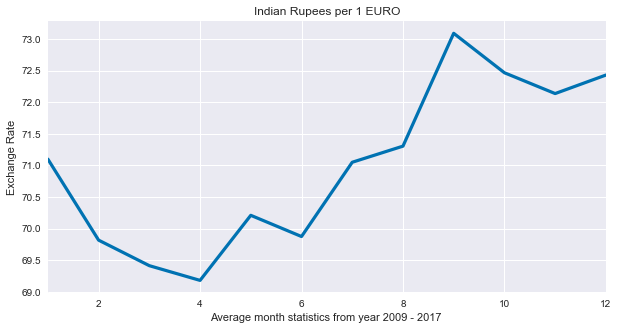

In [33]:
# Line plot, include a title 
p = India_monthly_data["mean"].plot(title="Indian Rupees per 1 EURO",figsize=(10,5) , linewidth=3.2)
# Set the label of Y-Axis
p.set_ylabel("Exchange Rate")
# Set the label of X-Axis
p.set_xlabel("Average month statistics from year 2009 - 2017 ")

From above line graph, and after analyse the data from 2009 - 2017, It can be inferred that in the month of April the Indian Rupees (INR)is cheaper (1 Euro = 69.25 INR) and In the month of September the Indian Rupees (INR)is expensive (1 Euro = 73.5), therefore if anyone want to exchange its indian currency with euro April is the best time.

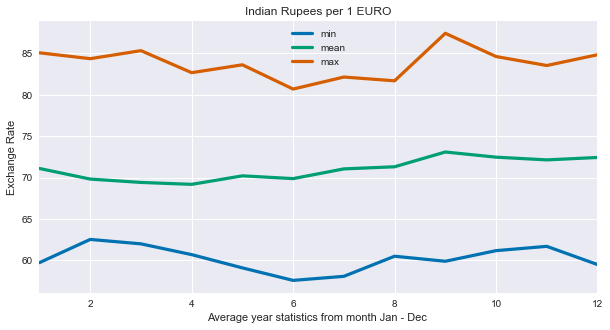

In [34]:
India_monthly_data.plot(title="Indian Rupees per 1 EURO",figsize=(10,5) , linewidth=3.2)
plt.ylabel("Exchange Rate")
plt.xlabel("Average year statistics from month Jan - Dec ")

The above line graph shows the Maximum, minimum and average vaule of every month from 2009 - 2017.

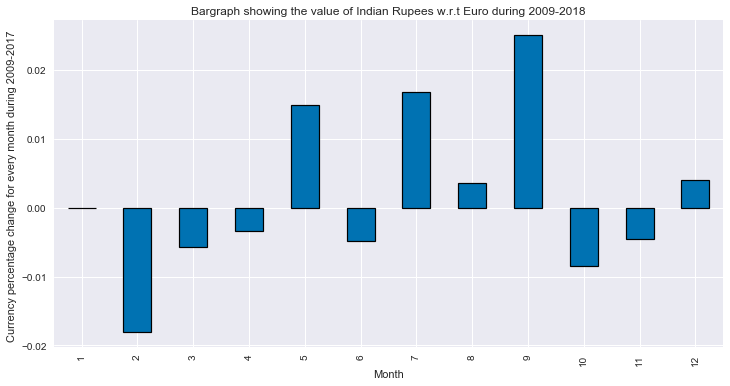

In [35]:
India_monthly_avg_data = India_monthly_data["mean"]
India_monthly_perct_chng = India_monthly_avg_data.pct_change()

plt.figure()
# plot the bargraph
India_monthly_perct_chng.plot.bar(figsize=(12,6),edgecolor='black', linewidth=1.2)
# set the title of the graph
plt.title("Bargraph showing the value of Indian Rupees w.r.t Euro during 2009-2018")
# Set the label of X-Axis
plt.xlabel("Month")
# Set the label of y-Axis
plt.ylabel("Currency percentage change for every month during 2009-2017 ")
# Set the limit of X-Axis
#plt.xlim([55.0,90.0])
plt.show()

From the above graph it is inferred that, the Indian currency (INR) is mostly increase in september as it has highest percentage change in september month w.r.t jan.

#### Line graph to analyse the Annual data of Indian Currency (INR)

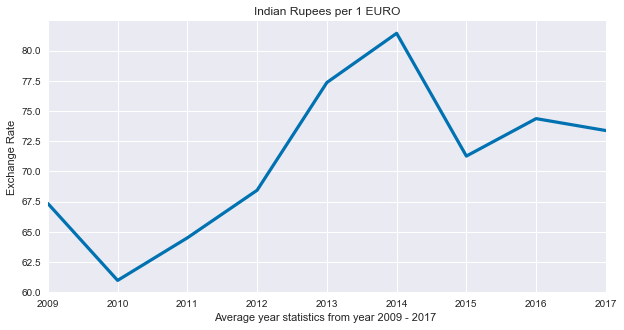

In [36]:
# Line plot, include a title
p = India_yearly_data["mean"].plot(title="Indian Rupees per 1 EURO",figsize=(10,5) , linewidth=3.2)
p.set_ylabel("Exchange Rate")
p.set_xlabel("Average year statistics from year 2009 - 2017 ")

From above line graph, and after analyse the data from 2009 - 2017, It can be inferred that in year 2010 the Indian Rupees (INR)is cheaper (1 Euro = 61 INR) and In year 2014 the Indian Rupees (INR) most is expensive (1 Euro = 81.5 INR).

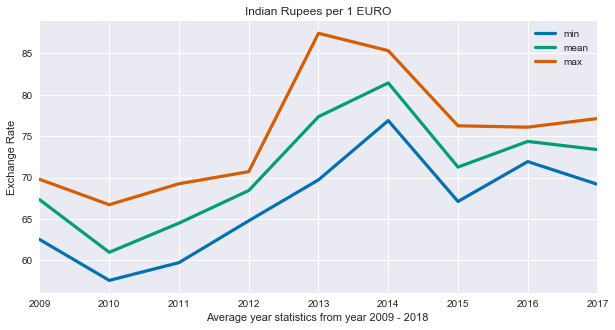

In [37]:
India_yearly_data.plot(title="Indian Rupees per 1 EURO",figsize=(10,5) , linewidth=3.2)
plt.ylabel("Exchange Rate")
plt.xlabel("Average year statistics from year 2009 - 2018 ")

The above line graph shows the Maximum, minimum and average vaule of every year from 2009 - 2017.

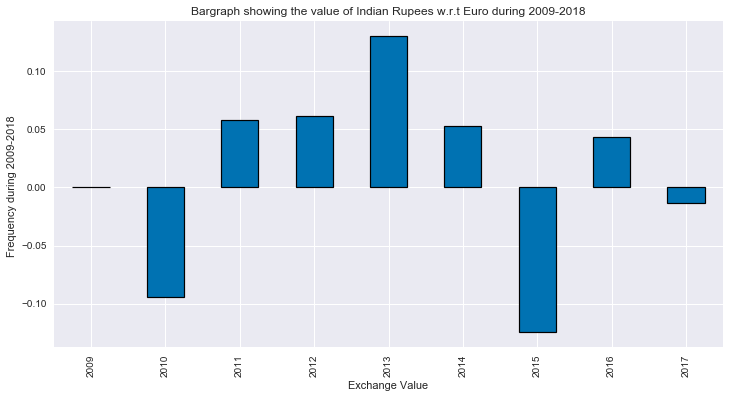

In [38]:
India_yearly_avg_data = India_yearly_data["mean"]
India_yearly_perct_chng = India_yearly_avg_data.pct_change()


plt.figure()
# plot the bar graph
India_yearly_perct_chng.plot.bar(figsize=(12,6),edgecolor='black', linewidth=1.2)
# set the title of the graph
plt.title("Bargraph showing the value of Indian Rupees w.r.t Euro during 2009-2018")
# Set the label of X-Axis
plt.xlabel("Exchange Value")
# Set the label of y-Axis
plt.ylabel("Frequency during 2009-2018 ")
# Set the limit of X-Axis
#plt.xlim([55.0,90.0])
plt.show()

From the above graph it is inferred that, the Indian currency (INR) has high value in year 2013 as it has highest percentage change in year 2013 month w.r.t 2009. Also, the Indian currency (INR) has low value in year 2015 as it has lowest percentage change in year 2015.

### Histogram Using Matplotlib

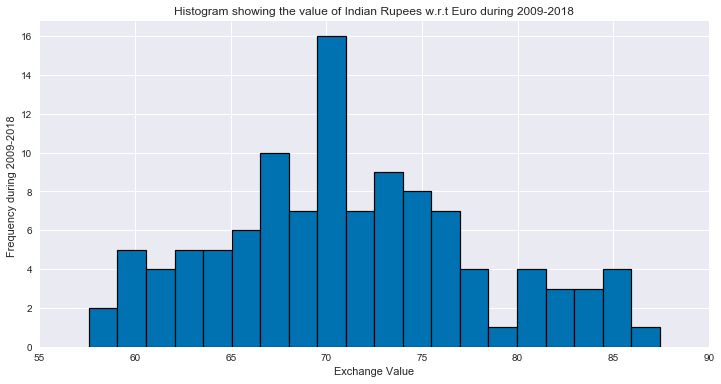

In [39]:
plt.figure()
# plot the histogram and divide the data into 20 bins
processed_df["INR"].plot.hist(figsize=(12,6),bins=20 ,edgecolor='black', linewidth=1.2)
# set the title of the graph
plt.title("Histogram showing the value of Indian Rupees w.r.t Euro during 2009-2018")
# Set the label of X-Axis
plt.xlabel("Exchange Value")
# Set the label of y-Axis
plt.ylabel("Frequency during 2009-2018 ")
# Set the limit of X-Axis
plt.xlim([55.0,90.0])
plt.show()

The above graph shows the Indian Rupees ("INR") currency value frequency for time period 2009 - present, the graph suggest that 1 Euro = approx 70 INR. The frequency of currency is maximum in exchange value range 67 to 72 INR.

### Scatter Plot Using Matplotlib

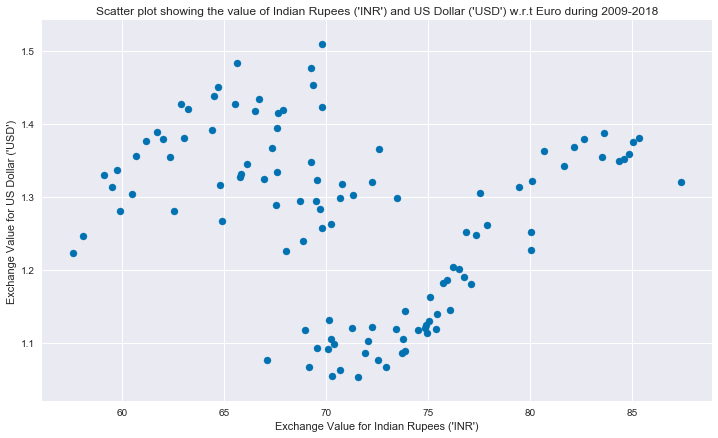

In [40]:
# To plot the scatter plot with X-axis representing depth and y-axis represeting magnitude. 

processed_df.plot.scatter(x = "INR",y = "USD",figsize=(12,7) , s=50)
# Set the title of the graph
plt.title("Scatter plot showing the value of Indian Rupees ('INR') and US Dollar ('USD') w.r.t Euro during 2009-2018")
# Set the label of x-Axis
plt.xlabel("Exchange Value for Indian Rupees ('INR')")
# Set the label of y-Axis
plt.ylabel("Exchange Value for US Dollar ('USD')")

plt.show()

### Distplot Using Seaborn

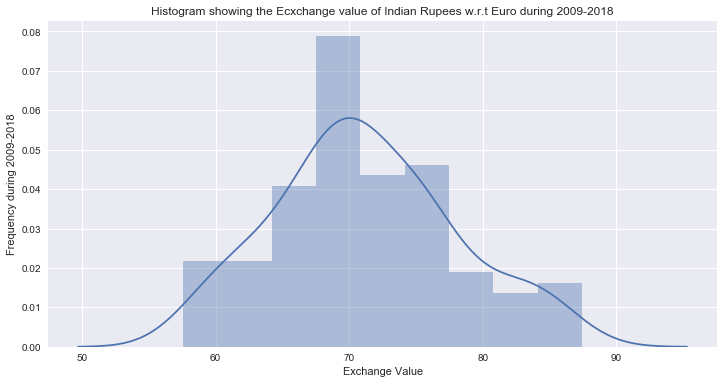

In [41]:
sns.set(rc={"figure.figsize": (12,6)})
# data to plot
x=processed_df["INR"]
#plot the graph
ax=sns.distplot(x,kde=True)
sns.despine()
ax.set(title="Histogram showing the Ecxchange value of Indian Rupees w.r.t Euro during 2009-2018")
# set the xlabel as magnitude
ax.set(xlabel="Exchange Value")
# set the ylabel as magnitude
ax.set(ylabel="Frequency during 2009-2018")

Seaborn Distplot function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. The above graph shows the frequency of Ecxchange value of Indian Rupees w.r.t Euro during 2009-2018 with the help of histogram and kde. The above graph also, shows the Indian Rupees ("INR") currency value frequency for time period 2009 - present, the graph suggest that 1 Euro = approx 70 INR. The frequency of currency is maximum in exchange value range 67 to 72 INR.

### Joint Plot Using Seaborn

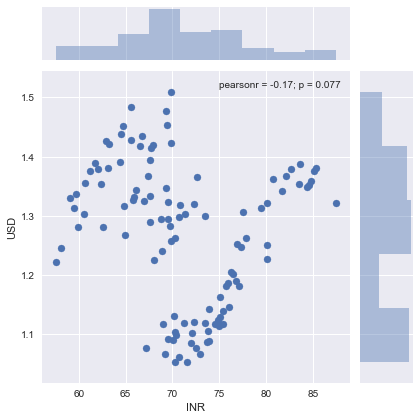

In [42]:
sns.set(rc={"figure.figsize": (6,6)})
# Plot joint plot 
sns.jointplot(x="INR",y="USD",data=processed_df)

The Above graph plots histogram and scatter plot in single graph. The y axis histogram is plotted on the right axis and the x axis histogram is plotted on the top axis, while the scatter plot is plotted in the center. The above graph is plotted between Exchange rate of "USA" and Exchange rate of "INR", histogram shows the frequency of the both. The USD histogram is plotted on the right axis and the IND histogram is plotted on the top axis.

### Categorized Data Analysis
The Indian Currency (INR) Exchange Rate were categorized in 4 risk categories w.r.t EURO.

The first category is High, INR with Exchange Rate greater than 75 and less than or equal to 90 comes under this category.

The second category is Medium, INR with Exchange Rate greater than 65 and less than or equal to 75 comes under this category.

The third category is Low risk, INR with Exchange Rate greater than 50 and less than or equal to 65 comes under this category.

The fourth category is Uncategorised, all the INR that does not come in any of the above three category comes in this category.

In [43]:
# method to categorize the data in four categories
Ind_pie_data= updated_df[["Date" ,"INR"]]
lis = []
for i in Ind_pie_data["INR"]:
    if ( i> 75) &  (i<= 90):
        lis.append("High")
    elif (i>65) & (i<=75):
        lis.append("Medium")
    elif (i>=50) & (i<=65):
        lis.append("Low")
    else:
        lis.append("Uncategorized") 
# A new row named Risk is added to the data frame using the function above.    
Ind_pie_data["Exchange_type"]= lis
# to review the dataframe
Ind_pie_data[80:89]

/Users/shizan.pro/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,INR,Exchange_type
80,2015-09-01,75.052222,High
81,2015-10-01,73.436435,Medium
82,2015-11-01,72.054024,Medium
83,2015-12-01,70.686913,Medium
84,2016-01-01,71.930461,Medium
85,2016-02-01,73.879482,Medium
86,2016-03-01,73.732765,Medium
87,2016-04-01,75.444928,High
88,2016-05-01,76.088690,High


In [44]:
# Count the number of values in each category
pie_data=Ind_pie_data.Exchange_type.value_counts()
print (pie_data)

Medium    59
High      28
Low       21
Name: Exchange_type, dtype: int64


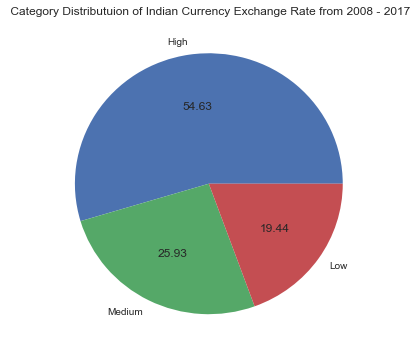

In [45]:
# Define the labels for the pie chart
labels=["High","Medium","Low"]
# Plot the ppie chart with labels as defined above and wedge percentage calculated upto 2 decimal places
plt.pie(pie_data,labels=labels ,autopct="%.2f")
# Set the title of the pie chart
plt.title(" Category Distributuion of Indian Currency Exchange Rate from 2008 - 2017")


The above pie chart shows the Indian currency Exchange data categorized in 3 categories.

54.63% of INR falls under High Exchange Rate category.

25.93% of INR falls under Medium Exchange Rate category.

19.44% of INR falls under Low Exchange Rate category.

From above pie chart, It can be inferred that most of time the exchange rate of Indian currency is greater than 75.
Which mean 1 EUR > 75 INR and it falls under High Exchange Rate category.

### Scatter Plot using Matplotlib

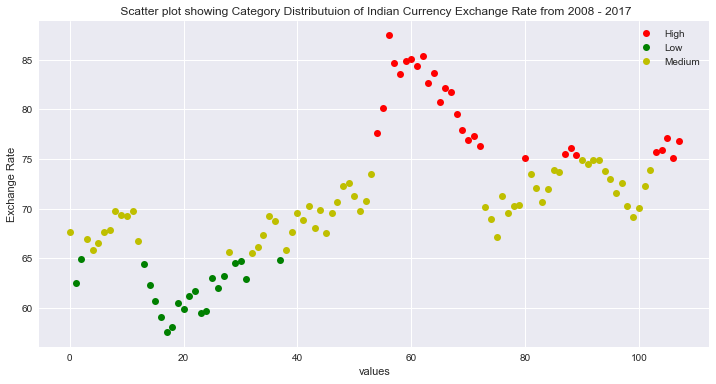

In [46]:
# A dataframe to only contain the columns magnitude, depth and risk
mag_dep = Ind_pie_data[["INR","Exchange_type"]]
# Group the data by Risk
groups= mag_dep.groupby("Exchange_type")
# Define colours for the different categories
colors = ['r', 'g','y'] 
color_index = 0
plt.figure(figsize=(12,6))
# plot the graph for different categories
for group in groups:
    # Assign the Colour 
    color = colors[color_index]
    group_label = group[0]
    group_data = group[1]
    # X-axis would represent magnitude while, y-axis would represent depth
    plt.plot(group_data['INR'], color=color, marker='o',linestyle='' ,label=group_label)
    color_index += 1

plt.title(" Scatter plot showing Category Distributuion of Indian Currency Exchange Rate from 2008 - 2017")  
plt.xlabel("values")
plt.ylabel("Exchange Rate")
# Define the range of x-axis
#plt.xlim([0,190])
# Define the range of y-axis
#plt.ylim([60,85])
plt.legend()
plt.show()

The above scatter plot is plot between INR value and Exchange_type categories. It can be inferred that most of the time the exchange rate of Indian currency is greater than 75 and it falls under High Exchange Rate category.

### Multiple Country Currency Data Analysis
Line graph and Bar plot is used to visualise the the data of multiple country and analysis which country has strongest currency exchange rate from 2009 - 2017, Also analysis for which time period EURO currency exchange  rates are high. With that I also analysis the percentage change in every year for some of the world popular currencies.

#### Analyse the multiple currencies from time period 2009 - present, and determine when EURO has high value, also which country currency are more fluctuating w.r.t EURO.

In [47]:
# define a function to visualise multiple country currencies in a line graph
def visualise_data(processed_df):
    # describe the plot size
    plt.figure(figsize=(15, 10))
    
    # remove the plot frame lines
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # enable gridline for y-axis
    ax.yaxis.grid(True)
    
    # change the x-axis limit to occupy texts
    plt.xlim(dates[0] - np.timedelta64(10, 'D'), dates[-1] + np.timedelta64(180, 'D'))
    
    # currencies used to make analysis
    multiple_cntry_analysis = ["USD", "INR",'CZK' ,"HKD","THB",'JPY','CZK','PHP','MXN']
    
    # A loop to iterate and plot the graph for all currencies present in list multiple_cntry_analysis
    for curr in processed_df.columns[2:]:
        if curr in multiple_cntry_analysis:
            plt.plot(dates, processed_df[curr], lw=2.5)
            x_pos = dates[-1] + np.timedelta64(30, 'D')
            y_pos = processed_df[curr].values[-1]
            ax.annotate(curr, xy=(x_pos, y_pos), xytext=(x_pos, y_pos))
          
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    
    # give title and X , Y axis labels
    plt.ylabel("Exchange Rate")
    plt.xlabel("Average year statistics from year 2009 - 2018 ")
    plt.title("Currency Exchange Rate of Multiple countries w.r.t Euro from 2008 - present \n")
    ax.annotate( "",xy=(dates[0], ymax), xytext=(dates[2], ymax+0.01), fontsize=16)
    


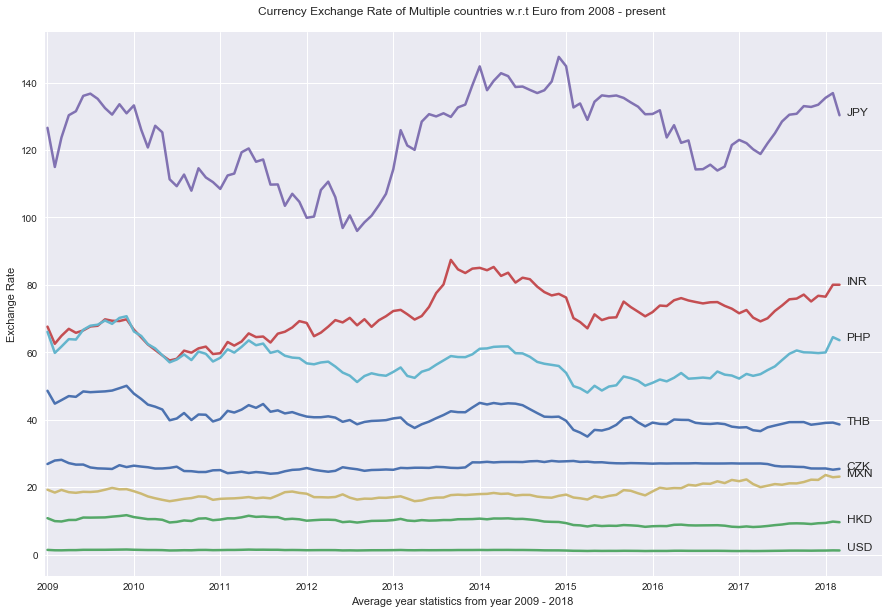

In [48]:
# Call the above define function to visualise the graph
visualise_data(processed_df)

The plot label time period from 2009 till present in X-axis and currency exchage rate w.r.t Euro in Y-axis, This visualisation can help us find out the ternd in countries currency value with respect to EURO. as we see in the plot from time period 2013 till mid of 2014, most of the countries currency exchange rate is high, this help us to analysis that for time period 2013 till mid of 2014 the rate of EURO has high. JPY (japan) currency are most fluctuating as it is 1 Euro = 95 JPY in mid 2012 and 1 Euro = 145 JPY in 2015.

#### Analyse some of the world popular currencies percentage change from 2009 - 2017, w.r.t EURO.

In [50]:
# create a new dataframe for some of the world popular country currencies
strong_econmy = updated_df[["Date" ,"INR","CHF", "USD", "GBP","JOD", "OMR", "BHD","KWD"]]

# Calculate the average of country currencies exchange rate for every year from 2009 - 2017
inrhh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['INR'].agg([ 'mean'])
usdhh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['USD'].agg([ 'mean'])
gbphh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['GBP'].agg([ 'mean'])
CHFhh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['CHF'].agg([ 'mean'])
JODhh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['JOD'].agg([ 'mean'])
OMRhh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['OMR'].agg([ 'mean'])
BHDhh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['BHD'].agg([ 'mean'])
KWDhh = strong_econmy.groupby(strong_econmy['Date'].dt.year)['KWD'].agg([ 'mean'])
# Calculate the percentage change of country currencies exchange rate w.r.t 2009,for every year from 2009 - 2017
inrh = inrhh.pct_change()
usdh = usdhh.pct_change()
gbph = gbphh.pct_change()
CHFh = CHFhh.pct_change()
JODh = JODhh.pct_change()
OMRh = OMRhh.pct_change()
BHDh = BHDhh.pct_change()
KWDh = KWDhh.pct_change()
# create a new dataframe containg the percentage change for some of the world popular country currencies
strong_econmy_percnt_chng = pd.concat([inrh,usdh,gbph,CHFh,JODh,OMRh,BHDh,KWDh],axis =1)
# coulmn name
strong_econmy_percnt_chng.columns=["INR","USD","GBP",'CHF','JOD','OMR','BHD','KWD']
strong_econmy_percnt_chng

,INR,USD,GBP,CHF,JOD,OMR,BHD,KWD
Date,,,,,,,,
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,-0.094505,-0.042512,-0.036845,-0.075924,-0.043262,-0.042512,-0.042555,-0.043902
2011,0.057785,0.050375,0.012212,-0.115980,0.051130,0.050438,0.050340,0.009306
2012,0.061069,-0.079522,-0.066267,-0.021792,-0.079764,-0.078616,-0.079062,-0.067618
2013,0.130252,0.028178,0.044347,0.019711,0.027607,0.028398,0.029082,0.042414
2014,0.052658,0.007238,-0.050087,-0.011326,0.006574,0.007260,0.006888,0.008648
2015,-0.124779,-0.165851,-0.096843,-0.115364,-0.164602,-0.165589,-0.165196,-0.117480
2016,0.043485,-0.003690,0.118561,0.015204,-0.004558,-0.004033,-0.004194,0.001286
2017,-0.013274,0.014791,0.069669,0.016244,0.013447,0.013579,0.013564,0.017773


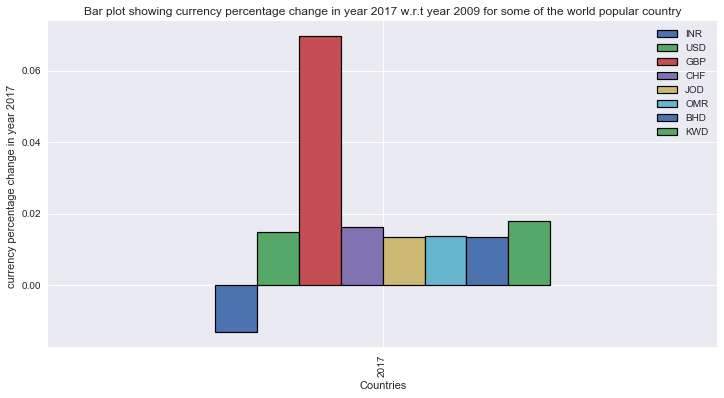

In [51]:
# currency percentage change in year 2017 w.r.t year 2009 for some of the world popular country currencies
strong_econmy_percnt_chng_2017 = strong_econmy_percnt_chng [8:9]
plt.figure()
# plot the bargraph
strong_econmy_percnt_chng_2017.plot.bar(figsize=(12,6),edgecolor='black', linewidth=1.2)
# set the title of the graph
plt.title("Bar plot showing currency percentage change in year 2017 w.r.t year 2009 for some of the world popular country")
# Set the label of X-Axis
plt.xlabel("Countries")
# Set the label of y-Axis
plt.ylabel("currency percentage change in year 2017 ")
plt.show()

Bar pot show us that in year 2017 "GBP" the Great Britain Pound has highest percentage change in its currecy exchange rate, Which means "GBP" become more stronger in 2017 w.r.t to its value in 2009, also, "INR" the Indian Rupees has lowest percentage change in its currecy exchange rate, Which means "INR" become more weaker in 2017 w.r.t to its value in 2009.  

####  Analyse the dataset to compare the currency exchange rate of India, USA, and Birtain

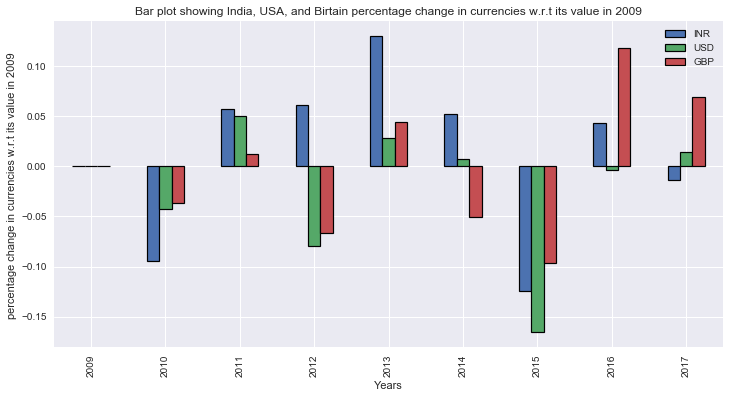

In [52]:
# create a dataframe containg the percentage change in currencies w.r.t its value in 2009.
IUG_percnt_chng = strong_econmy_percnt_chng[["INR","USD", "GBP"]]
plt.figure()
# plot the bargraph
IUG_percnt_chng.plot.bar(figsize=(12,6),edgecolor='black', linewidth=1.2)
# set the title of the graph
plt.title("Bar plot showing India, USA, and Birtain percentage change in currencies w.r.t its value in 2009")
# Set the label of X-Axis
plt.xlabel("Years")
# Set the label of y-Axis
plt.ylabel("percentage change in currencies w.r.t its value in 2009 ")
plt.show()

The Bar plot show us in year 2010 and 2015 all the three countries India, USA, and Birtain have percentage decrease in its currency value w.r.t to its value in 2009. Also in year 2015 all three countries have most precentage decrease in its currencies value which mean Euro rate are higger in year 2015.

####  Analyse the dataset to get the country which have highest currency value in the world

In [53]:
# calculate the mean of all countries currencies in the dataset and sort the value in inreaseing order
Highest_currency_country = updated_df.mean().sort_values()
# select the top three value 
Highest_currency_country.head(3)

KWD    0.366454
BHD    0.478202
OMR    0.488399
dtype: float64

The top three countries which have highest currency value are Kuwait ("KWD"), Bahrain ("BHD"), Oman ("OMR")

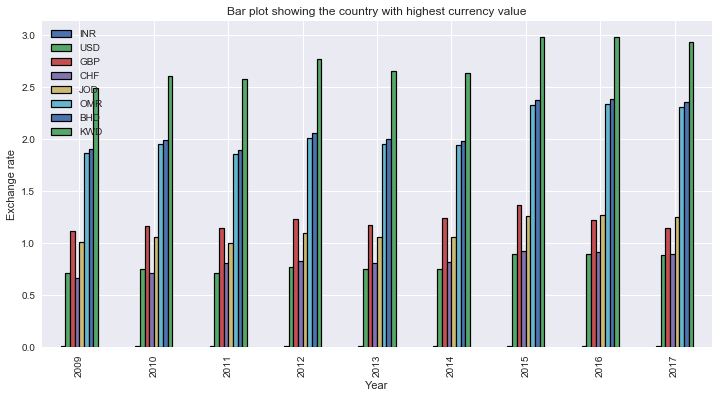

In [54]:
# create a dataframe containing average currency value for each year
strong_econmy_yearly_mean = pd.concat([inrhh,usdhh,gbphh,CHFhh,JODhh,OMRhh,BHDhh,KWDhh],axis =1)
# column name
strong_econmy_yearly_mean.columns=["INR","USD","GBP",'CHF','JOD','OMR','BHD','KWD']
# country which have least value has highest exchange rate
strong_econmy_anual_mean = (1/strong_econmy_yearly_mean)
plt.figure()
# plot the bargraph
strong_econmy_anual_mean.plot.bar(figsize=(12,6),edgecolor='black', linewidth=1.2)
# set the title of the graph
plt.title("Bar plot showing the country with highest currency value")
# Set the label of X-Axis
plt.xlabel("Year")
# Set the label of y-Axis
plt.ylabel("Exchange rate")
plt.show()

The Bar plot show us from year 2009 - 2017, continuously the Kuwait has the highest currency value followed by Bahrain, then followed by Oman. therefore top three countries which have highest currency value are Kuwait ("KWD"), Bahrain ("BHD"), Oman ("OMR").

### Tentative Conclusion

Further in-depth studies and tests could be carried out to make statistically significant results, after analyse the data from 2009 - 2017, It can be inferred that the top three contries which have very strong currencies are Kuwait ("KWD"), Bahrain ("BHD"), Oman ("OMR") these countries have topped the chart for almost every year. Also I have analyse the Indian Currency ("INR") after analysis I found that INR lie between range [59 - 85], also I found that in the month of April the Indian Rupees (INR) currency exchange rate is cheaper and In the month of September the Indian Rupees (INR) currency exchange rate is expensive, therefore if anyone want to exchange its Indian currency with euro they should avoid exchange in the month of September and one should prefer April as euro has less value in April and it is the best time to exchange currencies.